Nama: Dina Amelia

In [6]:
!pip install langchain_community
!pip install replicate

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [8]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
  model=model,
  replicate_api_token=api_token,
)

In [9]:
# Contoh uji coba Granite
test_response = output.invoke("Jelaskan apa itu credit risk dalam bahasa sederhana")
print(test_response)

Credit risk, dalam kata mudah, adalah keunggulan atau kemungkinan bahwa seseorang atau perusahaan tidak akan mampu menuruti kewajiban mereka untuk membayar utang atau pinjaman yang telah diberikan. Jika seseorang atau perusahaan mengalami masalah finansial, mereka mungkin tidak dapat membayar pinjaman mereka secara penuh atau secara waktu yang ditentukan. Ini dapat menyebabkan kerugian bagi instansi yang menyediakan pinjaman, seperti bank.

Misalnya, jika bank memberikan pinjaman kepada seseorang untuk membeli rumah, credit risk adalah keunggulan bahwa dekati masa depan, dekati tersebut mungkin tidak dapat membayar pinjaman karena kesulitan finansial mereka. Bank harus mengevaluasi dan mengurangi credit risk mereka dengan melakukan penilaian kredit yang kuat dan memastikan bahwa pinjaman mereka hanya diberikan kepada orang yang memiliki kemampuan untuk membayarnya.

Dalam konteks lembaga keuangan lebih luas, credit risk terkait dengan potensi kerugian akibat dari pinjaman atau investas

In [10]:
## Load Dataset
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [11]:
#eksplorasi data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None
         person_age  perso

In [12]:
print(df.isnull().sum()) #ini di cell yang terpisah aja biar gampang

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [13]:
from scipy.stats import zscore

# Select only numeric columns for z-score calculation
numeric_cols = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_cols]

# Calculate Z-scores
z_scores = np.abs(zscore(df_numeric))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = df_numeric[(z_scores > threshold).any(axis=1)]

print("Number of outliers found:", len(outliers))
print("Outliers:")
print(outliers)

Number of outliers found: 1390
Outliers:
       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              22          59000              123.0      35000          16.02   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
6              26          77100                8.0      35000          12.42   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475      

In [14]:
#isi missing value kategori dengan modus #pilih salah satu
for col in df.select_dtypes(exclude=[np.number]).columns:
  df[col] = df[col].fillna(df[col].mode()[0])

# Cek outlier sederhana (contoh: pendapatan sangat besar)
q_low = df["person_income"].quantile(0.01)
q_hi  = df["person_income"].quantile(0.99)
df = df[(df["person_income"] > q_low) & (df["person_income"] < q_hi)]

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)

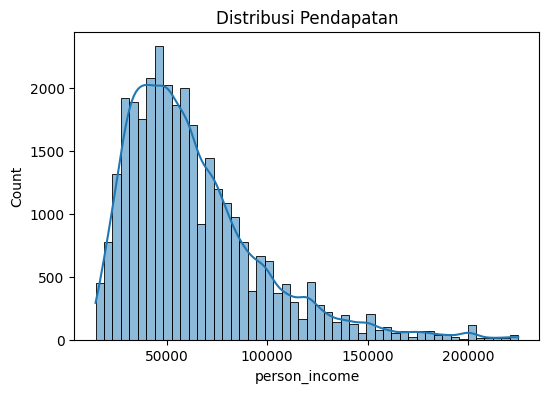

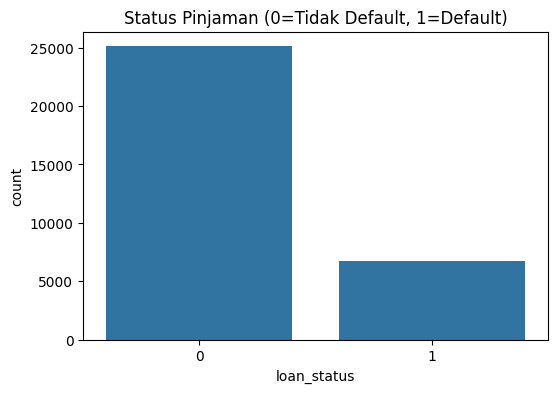

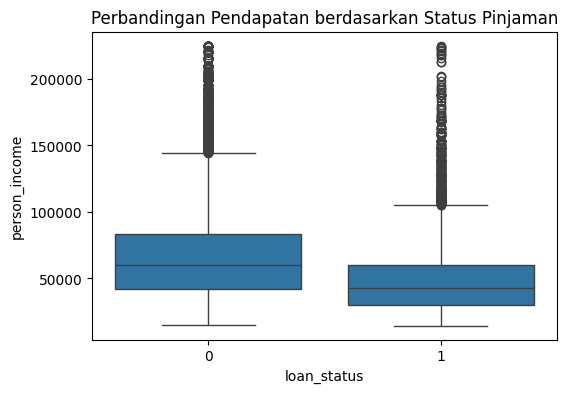

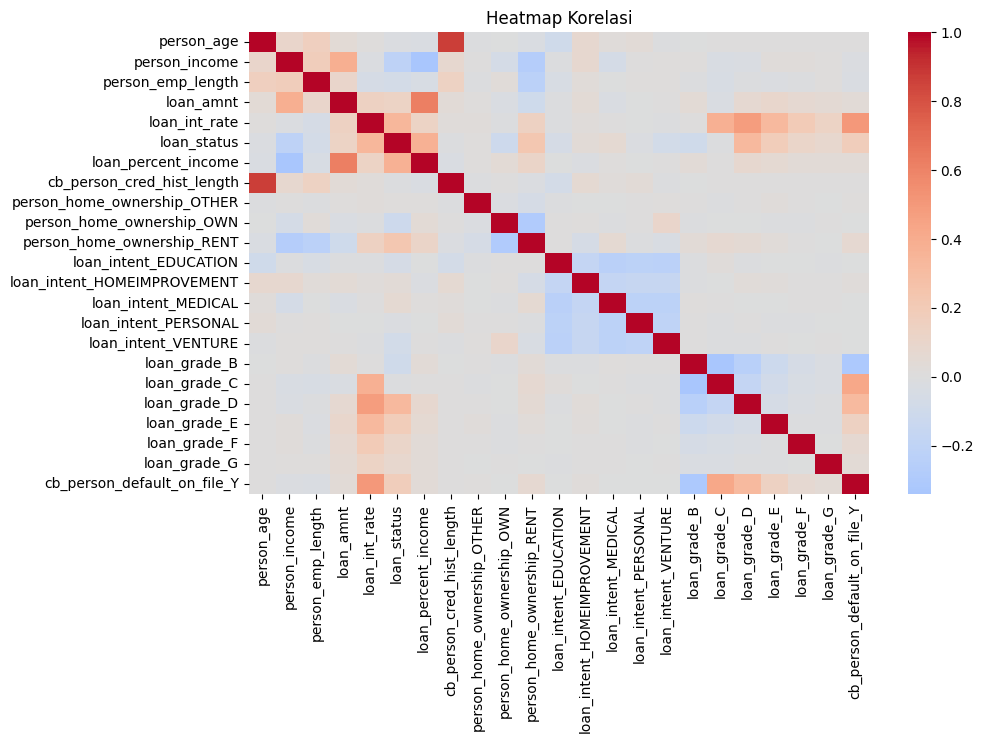

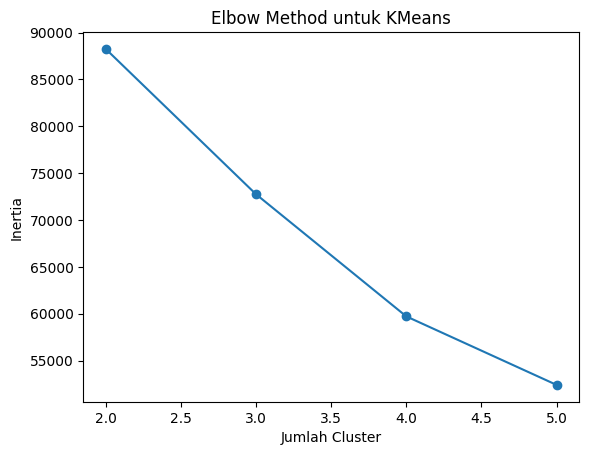

/tmp/ipython-input-3618167575.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Cluster"] = kmeans.fit_predict(X_scaled)


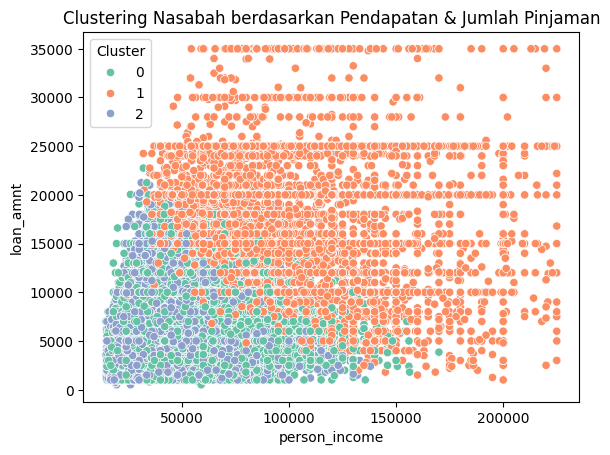

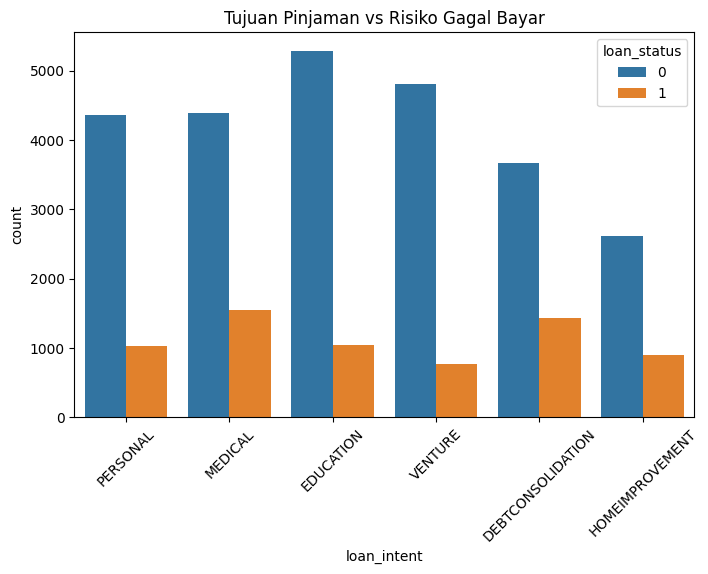

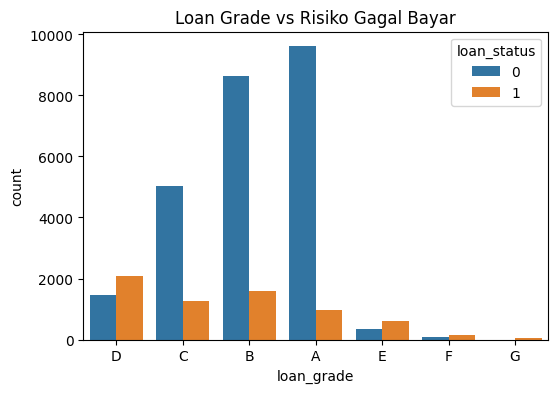

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df["person_income"], bins=50, kde=True)
plt.title("Distribusi Pendapatan")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="loan_status", data=df)
plt.title("Status Pinjaman (0=Tidak Default, 1=Default)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="loan_status", y="person_income", data=df)
plt.title("Perbandingan Pendapatan berdasarkan Status Pinjaman")
plt.show()

# Korelasi numerik
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi")
plt.show()

# =======================================
# Clustering
# =======================================
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ["person_age", "person_income", "loan_amnt", "loan_int_rate"]
# Drop rows with missing values in the selected features before scaling and clustering
df_cleaned = df.dropna(subset=features)
X = df_cleaned[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cari jumlah cluster optimal (elbow method)
inertia = []
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,6), inertia, marker="o")
plt.title("Elbow Method untuk KMeans")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.show()

# Ambil 3 cluster misalnya
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added n_init
df_cleaned["Cluster"] = kmeans.fit_predict(X_scaled)
# Assign cluster labels back to the original dataframe, aligning on index
df["Cluster"] = df_cleaned["Cluster"]

sns.scatterplot(x="person_income", y="loan_amnt", hue="Cluster", data=df_cleaned, palette="Set2") # Use df_cleaned
plt.title("Clustering Nasabah berdasarkan Pendapatan & Jumlah Pinjaman")
plt.show()

# =======================================
# Tren tambahan
# =======================================
plt.figure(figsize=(8,5))
sns.countplot(x="loan_intent", hue="loan_status", data=df)
plt.title("Tujuan Pinjaman vs Risiko Gagal Bayar")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="loan_grade", hue="loan_status", data=df)
plt.title("Loan Grade vs Risiko Gagal Bayar")
plt.show()

In [19]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
  model=model,
  replicate_api_token=api_token,
)

In [23]:
# =======================================
# Summarization Insight (IBM Granite) tambahin jumlah token
# =======================================
# Set model parameters for prompting with default values
parameters = {
 "top_k": 40,
 "top_p": 1.0,
 "temperature": 0.5,
 "max_tokens": 2000,
 "min_tokens": 0,
 "random_seed": None,
 "repetition_penalty": 1.0,
 "stopping_criteria": "length (2000 tokens)",
 "stopping_sequence": None
}

summary_text = f"""
Dataset credit risk sudah dianalisis.
Jumlah data: {df.shape[0]} baris.
Jumlah cluster: 3.
Contoh cluster:
- Cluster 0: {df[df.Cluster==0][features].mean().to_dict()}
- Cluster 1: {df[df.Cluster==1][features].mean().to_dict()}
- Cluster 2: {df[df.Cluster==2][features].mean().to_dict()}

Tolong jelaskan dengan bahasa Indonesia yang runtut dan mudah dipahami:
1. Pola nasabah untuk Cluster 0.
2. Pola nasabah untuk Cluster 1.
3. Pola nasabah untuk Cluster 2.
4. Faktor-faktor utama yang mempengaruhi risiko gagal bayar pada tiap cluster.

Pastikan penjelasan untuk **semua cluster (0, 1, dan 2)** diberikan secara lengkap.
"""

granite_summary = output.invoke(summary_text, parameters=parameters)
print("=== Insight Granite ===")
print(granite_summary)

=== Insight Granite ===
1. Pola Nasabah untuk Cluster 0:
Cluster 0 terdiri dari nasabah yang umur sekitar 27,49 tahun dan pendapatan sekitar 56.820.000 rupiah. Pinjaman yang mereka ambil adalah sekitar 7.367.389 rupiah dengan tingkat suku bunga pinjaman sekitar 7,95%. Ini menunjukkan bahwa nasabah pada Cluster 0, umumnya muda dan memiliki pendapatan yang relatif tinggi, tetapi mereka menerima pinjaman yang relatif kecil dan tingkat suku bunga yang relatif rendah.

2. Pola Nasabah untuk Cluster 1:
Cluster 1 terdiri dari nasabah yang umur sekitar 29,39 tahun dan pendapatan sekitar 103.662.000 rupiah. Pinjaman yang mereka ambil adalah sekitar 17.678.104 rupiah dengan tingkat suku bunga pinjaman sekitar 11,94%. Nasabah pada Cluster 1 lebih tua daripada Cluster 0 dan memiliki pendapatan yang lebih tinggi. Mereka juga menerima pinjaman yang lebih besar dan memiliki tingkat suku bunga yang lebih tinggi.

3. Pola Nasabah untuk Cluster 2:
Cluster 2 terdiri dari nasabah yang umur sekitar 26,92 t

In [24]:
#buat rasio income terhadap loan
df["income_to_loan_ratio"] = df["person_income"] / (df["loan_amnt"] + 1)
df[["person_income", "loan_amnt", "income_to_loan_ratio"]].head()

,person_income,loan_amnt,income_to_loan_ratio
0,59000,35000,1.685666
3,65500,35000,1.871375
4,54400,35000,1.554241
6,77100,35000,2.202794
7,78956,35000,2.255821


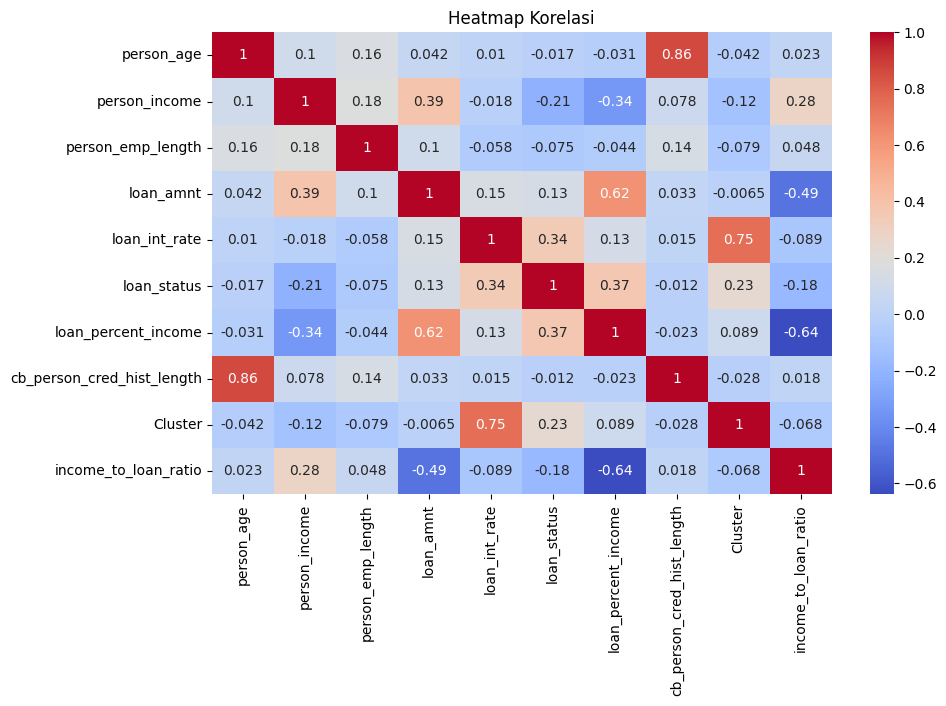

In [25]:
# 🔗 Korelasi antar fitur numerik
plt.figure(figsize=(10,6))
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

Berikut adalah alternatif menggunakan API yang lain untuk mendapatkan insight yang lebih bagus dan lengkap sesuai dengan prompt yang diberikan. Disini saya menggunakan openrouter untuk mendapatkan API.

In [26]:
# === API Clients ===
from openai import OpenAI
from google.colab import userdata
import os

router = userdata.get('router')
os.environ.get("router")
openrouter_client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=router
)

In [27]:
def make_summary_text(df, features):
    summary_text = f"""
    Dataset credit risk sudah dianalisis.
    Jumlah data: {df.shape[0]} baris.
    Jumlah cluster: 3.

    Ringkasan karakteristik tiap cluster (rata-rata tiap fitur):
    - Cluster 0: {df[df.Cluster==0][features].mean().to_dict()}
    - Cluster 1: {df[df.Cluster==1][features].mean().to_dict()}
    - Cluster 2: {df[df.Cluster==2][features].mean().to_dict()}

    Tolong jelaskan dengan bahasa Indonesia yang runtut dan mudah dipahami:
    1. Pola nasabah untuk Cluster 0.
    2. Pola nasabah untuk Cluster 1.
    3. Pola nasabah untuk Cluster 2.
    4. Faktor-faktor utama yang mempengaruhi risiko gagal bayar pada tiap cluster.

    Pastikan penjelasan untuk **semua cluster (0, 1, dan 2)** diberikan secara lengkap.
    """
    try:
        response = openrouter_client.chat.completions.create(
            model="deepseek/deepseek-r1-distill-llama-70b:free",
            messages=[{"role": "user", "content": summary_text}],
            max_tokens=10000,
            temperature=0.7,
            top_p=0.9
        )

        # cek struktur respons
        if hasattr(response.choices[0], "message") and hasattr(response.choices[0].message, "content"):
            return response.choices[0].message.content
        elif hasattr(response.choices[0], "text"):
            return response.choices[0].text
        else:
            return str(response)

    except Exception as e:
        return f"Gagal mendapatkan interpretasi. Error: {e}"
result = make_summary_text(df, features)
print(result)

### Penjelasan Pola Nasabah dan Faktor Risiko Gagal Bayar untuk Tiap Cluster

#### 1. **Cluster 0:**
   - **Pola Nasabah:**  
     Nasabah dalam Cluster 0 rata-rata berusia 27.49 tahun, dengan pendapatan sekitar Rp56.818. Ini menunjukkan bahwa mereka relatif muda dan memiliki pendapatan yang relatif rendah dibandingkan dengan cluster lainnya. Mereka biasanya meminjam dana dengan jumlah yang relatif kecil (rata-rata Rp7.367) dan memiliki suku bunga pinjaman yang relatif rendah (7.95%).  
     Pola ini menunjukkan bahwa nasabah dalam cluster ini mungkin memiliki kemampuan finansial yang terbatas atau lebih konservatif dalam mengambil risiko pinjaman.

   - **Faktor Risiko Gagal Bayar:**  
     Faktor utama yang mempengaruhi risiko gagal bayar pada cluster ini mungkin adalah pendapatan yang relatif rendah dan kemampuan finansial yang terbatas. Meskipun suku bunga pinjaman relatif rendah, pendapatan yang terbatas dapat membuat nasabah dalam cluster ini lebih rentan mengalami kesulitan pemb